In [10]:
# This Notebook can be used to generate graphs in figure1
# Since the dataset is generate randomly, the resulted graphs are not identical


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from scipy.stats import spearmanr

In [11]:
roh = 0.30
size_data = 200
number_of_lines = 100

df_data = pd.DataFrame(columns=['x','y','real_label','visible_label','prediction'])

In [12]:
df_data['x'] = np.random.rand(size_data)
df_data['y'] = np.random.rand(size_data)
df_data['real_label'] = np.zeros(size_data)
df_data['visible_label'] = np.zeros(size_data)

In [13]:
address_main = '/Users/vu/surfdrive/PostDoc/VUMC projrct/Related Matterials/Positive and unlabeled dataset/Code/Codes for Paper/Random Dataset Codes/'


## Define Real Labels

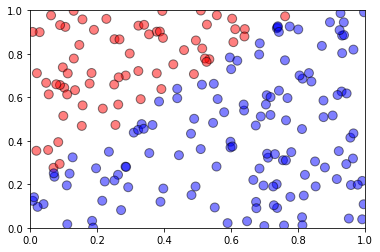

In [14]:
for i in range(0,size_data):
    x = df_data.loc[i,'x']
    y = df_data.loc[i,'y']
    #if (3*x ** 3 - 0.5 *x  + 0.2) < ( 0 *y **2 + 1 * y + 0): 
    #if ((x-0.5)**2 + 0.3 > y) :
    if (x  + 0.2) < ( y ): 
        df_data.loc[i,'real_label'] = +1
viz(df_data) #address_main + 'row_random_dataset.png')    

## Define visibility

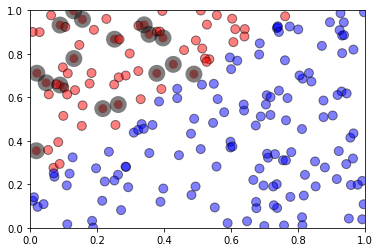

In [15]:
# Figure 1.a
df_data['visible_label'] = np.random.rand(size_data) < roh

df_data.loc[df_data['real_label'] == 0 ,'visible_label' ] = 0 
viz(df_data)#,address = address_main + 'row_random_dataset+highlights.png' ) 



### Create muyltiple linear Lines

In [16]:
#  F = Set of lines
F = np.zeros([number_of_lines,2]) 
for i in range (0,len(F)):
    [[x1,y1]] = np.random.rand(1,2)
    r = random.random()*math.pi*2
    w = math.sin(r)/math.cos(r)
    b = y1 - w*x1
    
    F[i,:]= [w,b]
    

In [17]:
size_data = len(df_data)
c=[]
alpha= []
S= 80
for i in range(0,size_data):
    if df_data.loc[i,'real_label'] == 0 :
        c.append('b')
    else:
        c.append('r')    

    if df_data.loc[i,'visible_label'] == 0 :
        alpha.append(1)
    else:
        alpha.append(8)


plt.scatter(df_data['x'],df_data['y'], alpha=0.7,linewidths=alpha,edgecolors = 'k', c=c,s=S)

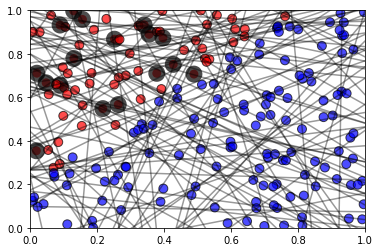

In [18]:
#figure 1.b
for i in range(0,len(F)):
    [w1,b] = F[i,:] 
    plt.plot([-10,10], [-10*w1+b,10*w1+b],c='k',alpha=0.4)

#plt.scatter(x1,y1)    
plt.xlim(-0,1)
plt.ylim(-0,1)



#plt.savefig(address_main + 'row_random_dataset+lines.png')

plt.show()

### Predicting based on diffrernt Lines

In [19]:
ALL_F1 = []
ALL_F1_h = []
ALL_LEE = []

for i in range(0,len(F)):
    #print(i)
    [w1,b]= F[i,:]
    df_data['prediction'] = (w1 * df_data['x'] +b - df_data['y'] )>0

    TP_h = np.sum((df_data['prediction']==1) & (df_data['visible_label']==1))
    FN_h = np.sum((df_data['prediction']==0) & (df_data['visible_label']==1))
    if TP_h < FN_h :
        df_data['prediction']  = 1 - df_data['prediction'] 

    [F1,F1_h,LEE_score] = scores(df_data, roh)

    ALL_F1.append(F1)
    ALL_F1_h.append(F1_h)
    ALL_LEE.append(LEE_score)
    

#### Comparing the results

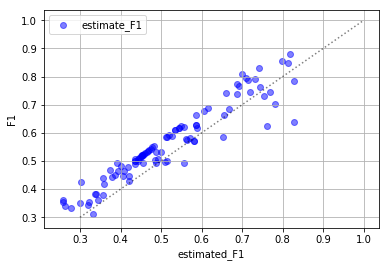

In [20]:
plt.scatter(ALL_F1_h , ALL_F1,c='b',alpha=0.5)
#plt.scatter(ALL_LEE , ALL_F1,c='r',alpha=0.5)
plt.legend(['estimate_F1'])
plt.xlabel('estimated_F1')
plt.ylabel('F1')
plt.plot([0.3,1.0],[0.3,1.0],c='k',alpha=0.5,linestyle=":")
plt.grid()
plt.savefig(address_main + 'row_dataset_(F1,vs,F1_).png')
plt.show()

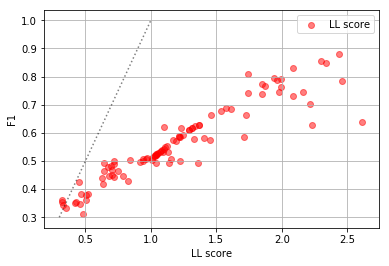

In [21]:
#plt.scatter(ALL_F1_h , ALL_F1,c='b',alpha=0.5)
plt.scatter(ALL_LEE , ALL_F1,c='r',alpha=0.5)
plt.legend(['LL score'])
plt.xlabel('LL score')
plt.ylabel('F1')
plt.plot([0.3,1.0],[0.3,1.0],c='k',alpha=0.5,linestyle=":")
plt.grid()
plt.savefig(address_main + 'row_dataset_(F1,vs,Lee).png')
plt.show()

## RMSE

In [28]:
df_W = pd.DataFrame(columns=['F1','F1_','LL'])
df_W['F1']=ALL_F1
df_W['F1_']=ALL_F1_h
df_W['LL']=ALL_LEE
df_W.head(2)

,F1,F1_,LL
0,0.663043,0.656371,1.724138
1,0.384279,0.336907,0.520106


In [29]:
for i in range(0,len(df_W)):
    df_W.loc[i,'Square_Error_F1'] = np.square(df_W.loc[i,'F1'] - df_W.loc[i,'F1_'])
    df_W.loc[i,'Square_Error_LL'] = np.square(df_W.loc[i,'F1'] - df_W.loc[i,'LL'])
df_W.head(2)

,F1,F1_,LL,Square_Error_F1,Square_Error_LL
0,0.663043,0.656371,1.724138,0.000045,1.125921
1,0.384279,0.336907,0.520106,0.002244,0.018449


In [30]:
# Table 2
np.sqrt(np.mean(df_W['Square_Error_F1']))

0.06492374825885715

In [31]:
# Table 2
np.sqrt(np.mean(df_W['Square_Error_LL']))

0.7724713728767265

# END

# Functions

#### Calculate Scores

In [6]:
def scores(df_temp, roh):
    TP = np.sum((df_temp['real_label']==1) &(df_temp['prediction']==1))
    FN = np.sum((df_temp['real_label']==1) &(df_temp['prediction']==0))
    FP = np.sum((df_temp['real_label']==0) &(df_temp['prediction']==1))
    
    TP_h = np.sum((df_temp['visible_label']==1) &(df_temp['prediction']==1))
    FN_h = np.sum((df_temp['visible_label']==1) &(df_temp['prediction']==0))
    FP_h = np.sum((df_temp['visible_label']==0) &(df_temp['prediction']==1))
    
    pr = TP / (TP+FP)
    re = TP / (TP+FN)
    
    pr_h = TP_h / (TP_h + FP_h)
    re_h = TP_h / (TP_h + FN_h)
    
    pr_h = pr_h / roh
    
    F1 = 2*pr*re/(pr+re)
    F1_h = 2*pr_h*re_h/(pr_h+re_h)
    LEE_score = (re_h**2) / (np.sum(df_temp['prediction']==1) / len(df_temp))
    
    if(False):
        print(' TP=', TP, ' FN=', FN, ' FP=', FP, 
              '\n TP_h=', TP_h, ' FN_h=', FN_h, ' FP_h=', FP_h,
             '\n pr=', pr, ' re=', re,
             '\n pr_h=', pr_h, ' re_h=', re_h,)
    
    return [F1,F1_h,LEE_score]

### Visualize the dataset

In [7]:

def viz(df_data,address=''):
    size_data = len(df_data)
    c=[]
    alpha= []
    S= 80
    for i in range(0,size_data):
        if df_data.loc[i,'real_label'] == 0 :
            c.append('b')
        else:
            c.append('r')    

        if df_data.loc[i,'visible_label'] == 0 :
            alpha.append(1)
        else:
            alpha.append(8)


    plt.scatter(df_data['x'],df_data['y'], alpha=0.5,linewidths=alpha,edgecolors = 'k', c=c,s=S)
    plt.xlim([0,1])
    plt.ylim([0,1])
    if (address!='') :
        print('saved')
        plt.savefig(address)
    plt.show()




In [8]:

def count_inversions(real_F1s, estimated_scores):
    errors_h = []

    for i in range(0,number_of_lines-1):
        F1_i = real_F1s[i]
        F1_h_i = estimated_scores[i]
        for j in range(i+1,number_of_lines):
            F1_j = real_F1s[j]
            F1_h_j = estimated_scores[j]


            if F1_i > F1_j :
                if F1_h_i < F1_h_j:
                    errors_h.append(F1_i-F1_j)

            elif F1_i < F1_j :
                if F1_h_i > F1_h_j:
                    errors_h.append(F1_j-F1_i)
    error_fraction = len(errors_h) / (number_of_lines *(number_of_lines-1)/2)
    print(len(errors_h))
    return(error_fraction)